In [11]:
from sklearn.metrics import silhouette_score
from dataset.proses_data import baca_dataset, atribut_data, normalisasi
from algoritma.kmedoid import sampel_kmedoid, data_medoid, visualisasi
import pandas as pd

In [12]:
dataset = baca_dataset() # Membaca dataset dari file CSV
atribut, data = atribut_data(dataset) # Mengambil atribut yang akan digunakan untuk klastering
data_skala = normalisasi(data) # Normalisasi data

In [13]:
print("dataset") #cetak dataset
print(dataset) #cetak dataset

dataset
      New Cases  New Deaths  New Recovered  New Active Cases  Total Cases  \
0           287          12            188                87        18441   
1          1956          20           1643               293       185691   
2           233          13            113               107        12388   
3          1504           3           1204               297        85083   
4           896           4            575               317        83252   
...         ...         ...            ...               ...          ...   
1027      13112         138          15022             -2048       636383   
1028       1665          44            902               719        72560   
1029       7399         160           4974              2265       440379   
1030       4530         202           3042              1286       285348   
1031       2530         168           1727               635       189705   

      Total Deaths  Total Recovered  Total Active Cases  
0        

In [14]:
# Meminta input jumlah klaster dari pengguna
n_klaster = int(input("Masukkan jumlah klaster yang diinginkan: ")) 

Masukkan jumlah klaster yang diinginkan: 3


In [15]:
sampel_kmedoid =  sampel_kmedoid(n_klaster, data, data_skala) # Melakukan klastering
label_klaster = sampel_kmedoid.predict(data_skala) # Mendapatkan label klaster untuk setiap sampel

In [16]:
data_medoid = data_medoid(sampel_kmedoid, dataset, atribut) #mendapatkan data medoid
print("medoid : ") # Menampilkan medoid
print(data_medoid) # Menampilkan medoid

medoid : 
     New Cases  New Deaths  New Recovered  New Active Cases  Total Cases  \
687       1953          35           1324               594       288820   
560        218           6            201                11        36679   
299        556          37            560               -41       128147   

     Total Deaths  Total Recovered  Total Active Cases  
687          3863           254663               30294  
560           885            31123                4671  
299          8990           111972                7185  


In [18]:
dataset['Klaster'] = label_klaster # Menambahkan kolom "Cluster" ke dalam dataset
print("klaster") # Menampilkan hasil klastering
print(dataset[atribut + ['Klaster']]) # Menampilkan hasil klastering

klaster
      New Cases  New Deaths  New Recovered  New Active Cases  Total Cases  \
0           287          12            188                87        18441   
1          1956          20           1643               293       185691   
2           233          13            113               107        12388   
3          1504           3           1204               297        85083   
4           896           4            575               317        83252   
5           862          64            641               157        85274   
6           246           9            342              -105        18687   
7          1894          26           2280              -412       187585   
8           291           2            217                72        12679   
9          1167           1            913               253        86250   
10          970          92            904               -26        84222   
11          763          70            678                15        

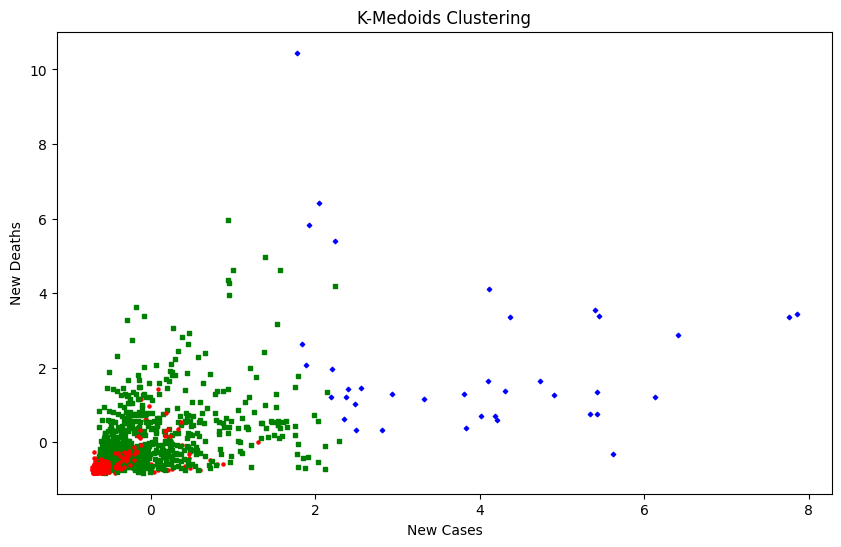

In [8]:
visualisasi(data_skala, label_klaster) # Visualisasi klaster

In [9]:
# Menghitung silhouette score
silhouette= silhouette_score(data_skala, label_klaster)
print("Skor Silhouette :", round(silhouette,2))

Skor Silhouette : 0.4
